In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()


2018-03-19 09:31:08,077 root         INFO     Load data from SQL.


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,predicted_price
count,1.855600e+04,18556.000000,18556.000000,18556.000000,18556.000000,18556.000000,18556.000000,1.855600e+04,18556.000000,18556.000000
mean,1.520843e+09,7409.231327,7415.647719,7412.685900,7412.535073,1.772158,0.060104,4.776422e+05,0.059753,1128.036521
std,3.382187e+05,808.000371,807.424456,807.653768,807.662758,3.787908,0.078486,3.266031e+05,0.035580,2467.048400
min,1.520272e+09,5930.000000,5970.960000,5955.390000,5955.390000,0.000673,-0.084993,2.743700e+04,-0.028105,0.000000
25%,1.520551e+09,6712.317500,6719.007500,6716.015000,6716.047500,0.150000,0.014489,2.268020e+05,0.031806,0.000000
50%,1.520830e+09,7379.960000,7382.765000,7380.020000,7380.010000,0.554976,0.043843,3.867440e+05,0.060676,0.000000
75%,1.521120e+09,7809.115000,7814.532500,7810.542500,7810.495000,1.783462,0.079846,6.385630e+05,0.082017,0.000000
max,1.521447e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.987974e+06,0.173389,7242.210000


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,predicted_price
time,1.000000,-0.885324,-0.886408,-0.885937,-0.885905,-0.035351,-0.061351,-0.012044,-0.232507,0.681592
low,-0.885324,1.000000,0.999897,0.999936,0.999952,-0.032901,0.045761,0.165962,0.141051,-0.531856
high,-0.886408,0.999897,1.000000,0.999952,0.999952,-0.022943,0.046817,0.165010,0.141435,-0.532882
open,-0.885937,0.999936,0.999952,1.000000,0.999912,-0.026901,0.046330,0.165389,0.141116,-0.532434
close,-0.885905,0.999952,0.999952,0.999912,1.000000,-0.027955,0.046232,0.165547,0.141331,-0.532373
volume,-0.035351,-0.032901,-0.022943,-0.026901,-0.027955,1.000000,0.061352,-0.062315,-0.011663,-0.029106
tw_sentiment,-0.061351,0.045761,0.046817,0.046330,0.046232,0.061352,1.000000,-0.138192,-0.101691,-0.151783
tw_followers,-0.012044,0.165962,0.165010,0.165389,0.165547,-0.062315,-0.138192,1.000000,-0.158024,0.222156
reddit_sentiment,-0.232507,0.141051,0.141435,0.141116,0.141331,-0.011663,-0.101691,-0.158024,1.000000,-0.389075
predicted_price,0.681592,-0.531856,-0.532882,-0.532434,-0.532373,-0.029106,-0.151783,0.222156,-0.389075,1.000000


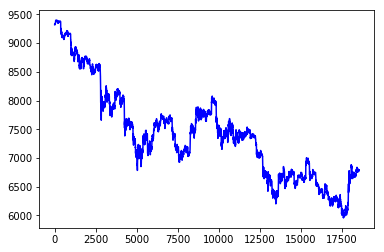

In [5]:
plt.plot(df['close'], 'b')

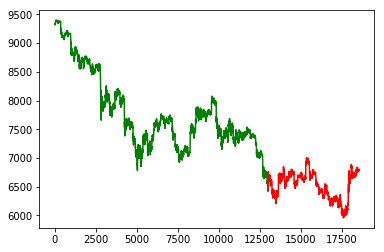

In [6]:
max = df['close'].count()
limit = int(0.3 * max)
plt.plot(df['close'][0:max - limit], 'g')
plt.plot(df['close'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109cd36d8>,
      dtype=object)

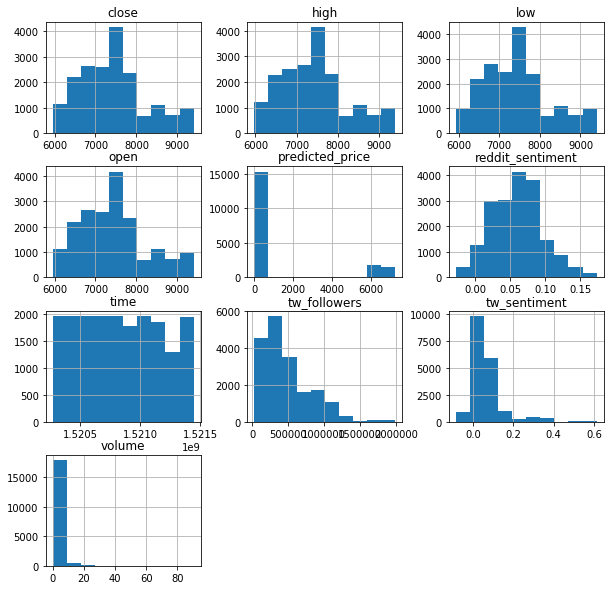

In [7]:
df.hist(figsize=(10,10))

In [8]:
from bitcoin.core import Core
core = Core()
history = core.train()

2018-03-19 09:31:11,184 root         INFO     ENV => test
2018-03-19 09:31:11,185 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-03-19 09:31:13,113 root         INFO     Load data from SQL.


ValueError: could not convert string to float: b'\x01'

In [ ]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [ ]:
core.train_anomaly()

In [ ]:
core.test_order_percent()